In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [18]:
# Define the function
import pandas as pd

def load_Titanic_Data():
    csv_path = "/kaggle/input/titanic/train.csv"
    return pd.read_csv(csv_path)
df= load_Titanic_Data()
df.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df["Survived"].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [20]:
import numpy as np
def split_train_test(data, test_ratio):
 shuffled_indices = np.random.permutation(len(data))
 test_set_size = int(len(data) * test_ratio)
 test_indices = shuffled_indices[:test_set_size]
 train_indices = shuffled_indices[test_set_size:]
 return data.iloc[train_indices], data.iloc[test_indices]

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


train_df = pd.read_csv("/kaggle/input/titanic/train.csv")

train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)



In [22]:
len(train_set)

712

In [23]:
len(test_set)

179

In [24]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [31]:

import pandas as pd
import numpy as np
train = pd.read_csv("/kaggle/input/titanic/train.csv")
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]
train_with_id = train.reset_index()
train_set, test_set = split_train_test_by_id(train_with_id, 0.2, "index")


In [33]:
titanic_with_id = train.copy()
titanic_with_id["id"] = titanic_with_id["PassengerId"]

train_set, test_set = split_train_test_by_id(titanic_with_id, 0.2, "id")

print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 714
Test set size: 177


In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

<Axes: >

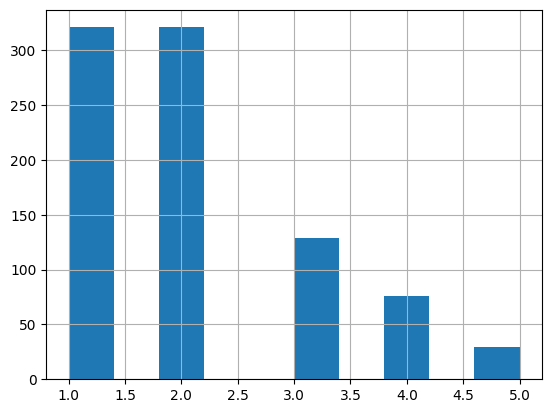

In [67]:
import pandas as pd
import numpy as np
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic = titanic.dropna(subset=["Fare"])

titanic["fare_cat"] = pd.cut(
    titanic["Fare"],
    bins=[0, 10, 30, 70, 150, float("inf")],
    labels=[1, 2, 3, 4, 5]
)

# Drop rows where fare_cat is still NaN (e.g., Fare was 0 or out of range)
titanic = titanic.dropna(subset=["fare_cat"])

titanic["fare_cat"].hist()

In [116]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic, titanic["Pclass"]):  # or fare_cat if you have it
    strat_train_set = titanic.iloc[train_index]
    strat_test_set = titanic.iloc[test_index]


In [70]:
>>> strat_test_set["fare_cat"].value_counts() / len(strat_test_set)

fare_cat
1    0.369318
2    0.363636
3    0.147727
4    0.085227
5    0.034091
Name: count, dtype: float64

In [72]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("fare_cat", axis=1, inplace=True)

In [73]:
titanic = strat_train_set.copy()

<Axes: xlabel='Age', ylabel='Fare'>

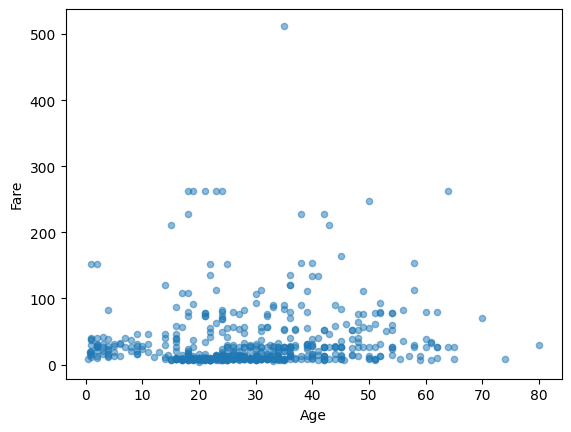

In [77]:
titanic.plot(kind="scatter", x="Age", y="Fare", alpha=0.5)


<Axes: xlabel='Age', ylabel='Fare'>

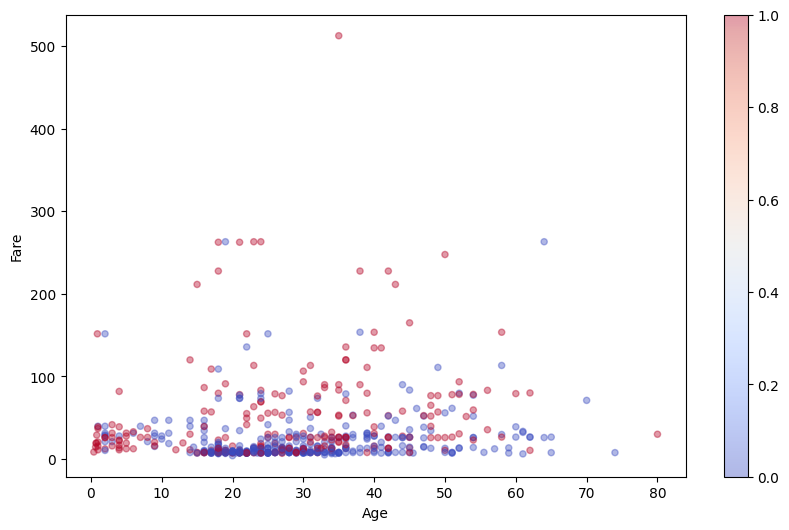

In [80]:
titanic.plot(kind="scatter", x="Age", y="Fare", alpha=0.4,
                   c=titanic["Survived"], cmap="coolwarm", colorbar=True,
                   figsize=(10, 6))


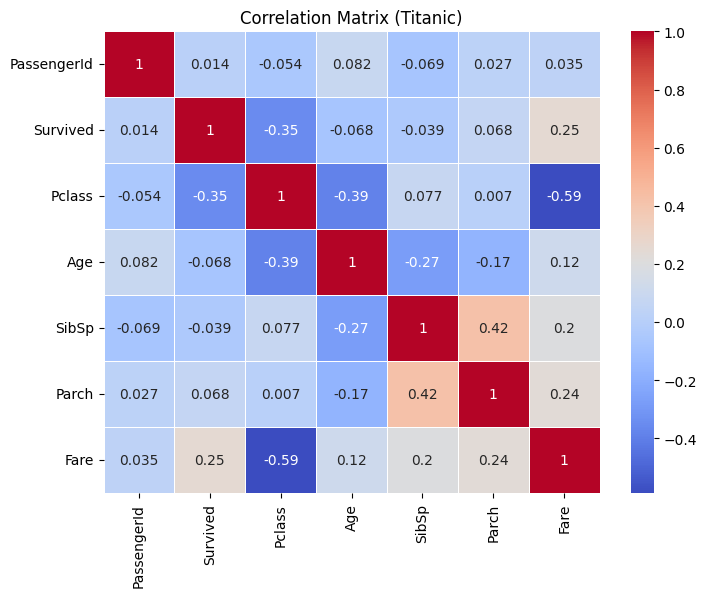

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = titanic.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (Titanic)")
plt.show()


In [84]:
corr_matrix = titanic.corr(numeric_only=True)
print(corr_matrix["Survived"].sort_values(ascending=False))


Survived       1.000000
Fare           0.252006
Parch          0.068067
PassengerId    0.014415
SibSp         -0.039239
Age           -0.068093
Pclass        -0.347496
Name: Survived, dtype: float64


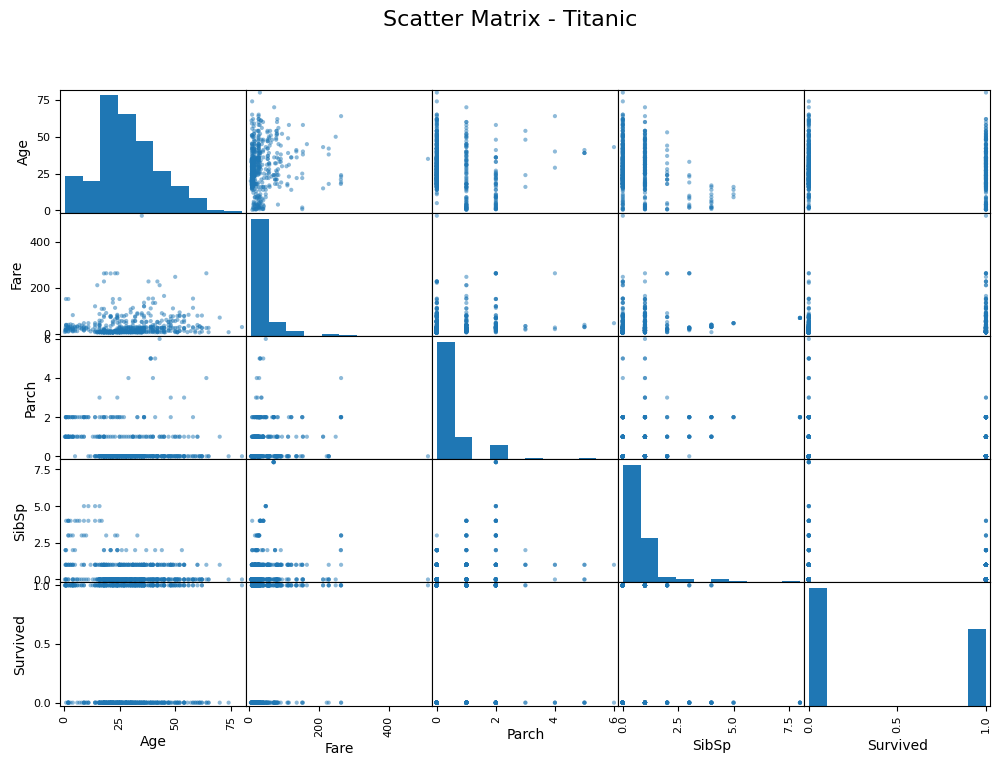

In [86]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["Age", "Fare", "Parch", "SibSp", "Survived"]
scatter_matrix(titanic[attributes], figsize=(12, 8), alpha=0.5)

plt.suptitle("Scatter Matrix - Titanic", fontsize=16)
plt.show()

<Axes: xlabel='Fare', ylabel='Age'>

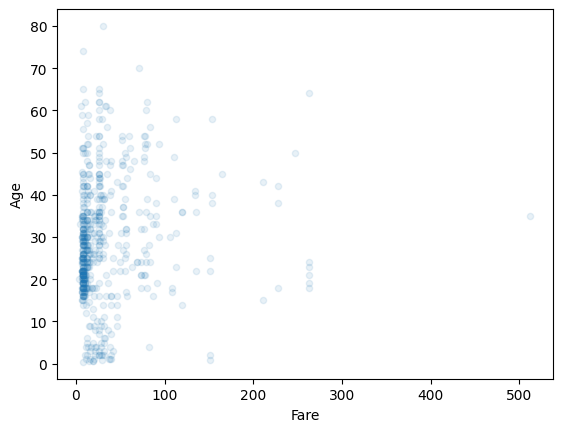

In [88]:
titanic.plot(kind="scatter", x="Fare", y="Age",
alpha=0.1)

By this point, I have taken all the sights of the data for training the model.

In [89]:
titanic["GroupSize"] = titanic["SibSp"] + titanic["Parch"] + 1
titanic["Fare_Per_Person"] = titanic["Fare"] / titanic["GroupSize"]
titanic = titanic.replace([np.inf, -np.inf], np.nan).dropna(subset=["Fare_Per_Person"])


In [90]:
corr_matrix = titanic.corr(numeric_only=True)
print(corr_matrix["Survived"].sort_values(ascending=False))


Survived           1.000000
Fare               0.252006
Fare_Per_Person    0.214524
Parch              0.068067
PassengerId        0.014415
GroupSize          0.007108
SibSp             -0.039239
Age               -0.068093
Pclass            -0.347496
Name: Survived, dtype: float64


In [122]:
import pandas as pd
titanic_full = pd.read_csv("/kaggle/input/titanic/train.csv")
print(titanic_full.columns)  # ✅ Check column names

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(titanic_full, titanic_full["Pclass"]):
    strat_train_set = titanic_full.iloc[train_index]
    strat_test_set = titanic_full.iloc[test_index]
titanic_labels = strat_train_set["Survived"].copy()
titanic = strat_train_set.drop("Survived", axis=1)  # ← This line was repeated unnecessarily


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [94]:
titanic = titanic.dropna(subset=["Age"])  # drops rows where Age is missing


In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [97]:
titanic_num = titanic.drop(["Sex", "Embarked", "Name", "Ticket", "Cabin"], axis=1)


In [98]:
imputer.fit(titanic_num)

SimpleImputer(strategy='median')

In [99]:
>>> imputer.statistics_

array([446.5,   3. ,  27. ,   0. ,   0. ,  15.8])

In [100]:
>>> titanic_num.median().values

array([446.5,   3. ,  27. ,   0. ,   0. ,  15.8])

In [101]:
X = imputer.transform(titanic_num)

In [103]:
titanic_num = titanic.drop(["Sex", "Embarked", "Name", "Ticket", "Cabin"], axis=1)
imputer.fit(titanic_num)
X = imputer.transform(titanic_num)

titanic_tr = pd.DataFrame(X, columns=titanic_num.columns, index=titanic_num.index)


In [104]:
titanic_cat = titanic[["Sex", "Embarked"]]
titanic_cat.head(10)


,Sex,Embarked
803,male,C
666,male,S
693,male,C
621,male,S
124,male,S
696,male,S
138,male,S
535,female,S
421,male,Q
665,male,S


In [105]:
>>> from sklearn.preprocessing import OrdinalEncoder
>>> ordinal_encoder = OrdinalEncoder()
>>> titanic_cat_encoded = ordinal_encoder.fit_transform(titanic_cat)
>>> titanic_cat_encoded[:10]

array([[1., 0.],
       [1., 2.],
       [1., 0.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [1., 2.],
       [0., 2.],
       [1., 1.],
       [1., 2.]])

In [106]:
>>> ordinal_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object)]

In [107]:
>>> from sklearn.preprocessing import OneHotEncoder
>>> cat_encoder = OneHotEncoder()
>>> titanic_cat_1hot = cat_encoder.fit_transform(titanic_cat)
>>> titanic_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1124 stored elements and shape (562, 6)>

In [108]:
>>> titanic_cat_1hot.toarray()

array([[0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.]])

In [109]:
>>> cat_encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object)]

this is a classification of categories

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class TitanicAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_fare_per_person=True):
        self.add_fare_per_person = add_fare_per_person

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        sibsp = X[:, 0]
        parch = X[:, 1]
        fare = X[:, 2]
        
        family_size = sibsp + parch + 1
        
        if self.add_fare_per_person:
            fare_per_person = fare / family_size
            return np.c_[X, family_size, fare_per_person]
        else:
            return np.c_[X, family_size]


custom transformer pipelines

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


num_attribs = ["SibSp", "Parch", "Fare"]
cat_attribs = ["Sex", "Embarked"]

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", TitanicAttributesAdder()),  # custom transformer
    ("std_scaler", StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])


In [127]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Numerical and categorical column lists for Titanic
num_attribs = ["SibSp", "Parch", "Fare"]  # example; adjust as needed
cat_attribs = ["Sex", "Embarked"]

# Final preprocessing pipeline
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

titanic_prepared = full_pipeline.fit_transform(titanic)


In [128]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(titanic_prepared, titanic_labels)


RandomForestClassifier(random_state=42)

In [129]:
from sklearn.metrics import accuracy_score

# Predict on the training set
titanic_predictions = forest_clf.predict(titanic_prepared)

# Compare to the true labels
accuracy = accuracy_score(titanic_labels, titanic_predictions)
print("Training Accuracy:", accuracy)


Training Accuracy: 0.9269662921348315


 Better Evaluation with Cross-Validation (Titanic, Classification)

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assume: titanic_prepared and titanic_labels are ready
forest_clf = RandomForestClassifier(random_state=42)

# Evaluate with cross-validation
scores = cross_val_score(forest_clf, titanic_prepared, titanic_labels, scoring="accuracy", cv=10)

# Print results
print("Cross-validation scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())


Cross-validation scores: [0.84722222 0.79166667 0.78873239 0.87323944 0.85915493 0.84507042
 0.8028169  0.76056338 0.76056338 0.71830986]
Mean: 0.8047339593114241
Standard deviation: 0.04784204186359803


In [131]:
from sklearn.ensemble import RandomForestClassifier

my_model = RandomForestClassifier(random_state=42)
my_model.fit(titanic_prepared, titanic_labels)


RandomForestClassifier(random_state=42)

Titanic Grid SearchCV

In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid for classifier
param_grid = [
    {'n_estimators': [50, 100, 150], 'max_features': [4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [50, 100], 'max_features': [4, 6]}
]

# Use RandomForestClassifier instead of Regressor
forest_clf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

# Fit on prepared Titanic training data
grid_search.fit(titanic_prepared, titanic_labels)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [4, 6, 8],
                          'n_estimators': [50, 100, 150]},
                         {'bootstrap': [False], 'max_features': [4, 6],
                          'n_estimators': [50, 100]}],
             return_train_score=True, scoring='accuracy')

In [133]:
>>> grid_search.best_params_

{'max_features': 8, 'n_estimators': 50}

In [134]:
>>> grid_search.best_estimator_

RandomForestClassifier(max_features=8, n_estimators=50, random_state=42)

In [137]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f"Accuracy: {mean_score:.4f}  Params: {params}")


Accuracy: 0.8005  Params: {'max_features': 4, 'n_estimators': 50}
Accuracy: 0.8005  Params: {'max_features': 4, 'n_estimators': 100}
Accuracy: 0.8047  Params: {'max_features': 4, 'n_estimators': 150}
Accuracy: 0.7948  Params: {'max_features': 6, 'n_estimators': 50}
Accuracy: 0.7991  Params: {'max_features': 6, 'n_estimators': 100}
Accuracy: 0.8019  Params: {'max_features': 6, 'n_estimators': 150}
Accuracy: 0.8075  Params: {'max_features': 8, 'n_estimators': 50}
Accuracy: 0.8005  Params: {'max_features': 8, 'n_estimators': 100}
Accuracy: 0.7991  Params: {'max_features': 8, 'n_estimators': 150}
Accuracy: 0.7921  Params: {'bootstrap': False, 'max_features': 4, 'n_estimators': 50}
Accuracy: 0.7977  Params: {'bootstrap': False, 'max_features': 4, 'n_estimators': 100}
Accuracy: 0.7977  Params: {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}
Accuracy: 0.7977  Params: {'bootstrap': False, 'max_features': 6, 'n_estimators': 100}


In [138]:
from sklearn.metrics import accuracy_score

# 1. Get the best model from Grid Search
final_model = grid_search.best_estimator_

# 2. Prepare the test set (features and labels)
X_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"].copy()

# 3. Apply the preprocessing pipeline
X_test_prepared = full_pipeline.transform(X_test)

# 4. Predict on the test set
final_predictions = final_model.predict(X_test_prepared)

# 5. Evaluate
final_accuracy = accuracy_score(y_test, final_predictions)
print("Test Set Accuracy:", final_accuracy)


Test Set Accuracy: 0.770949720670391


Confidence Interval for Classification Accuracy

In [139]:
import numpy as np
import scipy.stats as stats

# Calculate accuracy
accuracy = accuracy_score(y_test, final_predictions)

# Sample size
n = len(y_test)

# Standard error of the proportion
se = np.sqrt((accuracy * (1 - accuracy)) / n)

# 95% confidence interval (z = 1.96)
confidence = 0.95
z = stats.norm.ppf((1 + confidence) / 2)
margin = z * se

# Confidence interval
lower_bound = accuracy - margin
upper_bound = accuracy + margin

print(f"Accuracy: {accuracy:.4f}")
print(f"95% Confidence Interval: [{lower_bound:.4f}, {upper_bound:.4f}]")


Accuracy: 0.7709
95% Confidence Interval: [0.7094, 0.8325]
